    ADALINE Y FUNCIÓN LOSS:
    DESCENSO POR GRADIENTE

    PREGUNTA 1: La fórmula de la línea 43 self.eta * errores.sum() es la actualización de:

El bias, el parámetro w0 de la neurona

    PREGUNTA 2: Si eliminamos o comentamos la línea 40 del código

No pasa nada porque al ser la función identidad en realidad no hace falta aplicarla, no hace
cambios, se usa para que se vea que la tiene

    PREGUNTA 3: Entrega el nuevo gráfico y responde:


    • ¿Cómo se ve ahora el gráfico?


Se ve en línea ascendente, lo cual es negativo porque el modelo no está aprendiendo si no más bien al revés

    • ¿Qué función de coste está usando? (marca una) (_)SSE (_)MSE (_)RMSE (_)GD


Está usando la función de coste SSE que lo que hace es acumular el coste de los errores al cuadrado

    A la vista del gráfico ¿Cuanto más estudia más aprende?

En este caso no, puesto que no está aprendiendo bien. El modelo hace que vaya a peor en vez de a mejor

    • ¿Qué valor de error comete cuando ha estudiado las 20 veces? ¿Y en escala logarítmica?

125,9

    Copia el código anterior en una nueva celda de un notebook y vuelve a
    usar escala lineal (quita los logaritmos de los datos que usamos). Prueba con 0.1 (dividiendo por 5 el
    anterior) y luego sigue dividiendo por 10 el valor del learning_rate y probando hasta que consigas el
    mínimo error

Leyendo dataset de iris
Último coste: 22.482293276375444


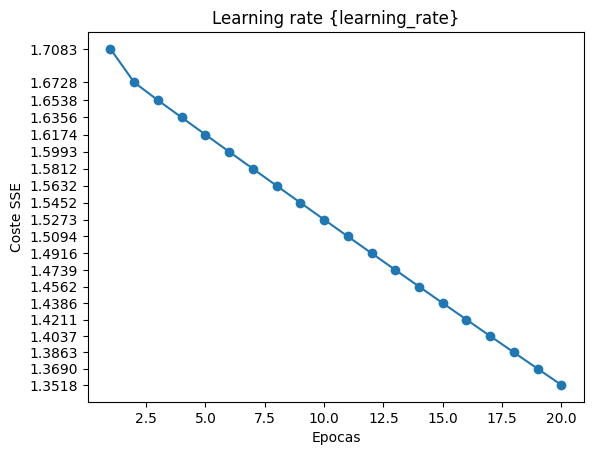

In [43]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class AdalineGDB(object):
    """Clasificador ADAptive LInear NEuron de Juan
    Parámetros:
    ------------
    eta: float Learning rate (entre 0.0 y 1.0)
    n_iter: int max. repasos que da (iteraciones) al dataset train
    semilla: int; semilla para el GMA
    Atributos:
    ------------
    w_: Id-array pesos que aprende después de entrenar
    coste_: lista valores de la función de coste SSE en cada época (repaso)
    """
    def __init__(self, eta=0.01, n_iter=50, semilla=1):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
        
    def fit(self, X, y):
        """ Entrena (Aprende)
        Parámetros:
        --------------
        X: {array}, estructura = [n_ejemplos, n_características]
        y: array, estructura = [n_ejemplos] valores target/label
        Devuelve:
        ----------
        self:object
        """
        rgen = np.random.RandomState(self.semilla)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.coste_ = []
        for _ in range(self.n_iter):
            entradas = self.entradas(X)
            salidas = self.activacion(entradas)
            errores = (y - salidas)
            self.w_[1:] += self.eta * X.T.dot(errores)
            self.w_[0] += self.eta * errores.sum()
            coste = (errores**2).sum() / 2.0
            self.coste_.append(coste)
        return self
    
    #Añadido Adaline
    def entradas(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.entradas(X) >= 0.0, 1, -1)
    
    def activacion(self, X):
        """Calcula la activación lineal"""
        return X
    
    
    
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))




#PASO 2: PREPARAR EL DATASET
#Leer el Dataset pidiéndolo
#lugar = input('Teclea el fichero con dataset Iris:')
#df = pd.read_csv(lugar, header=None, encoding='utf-8')
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
print('Leyendo dataset de iris')

#preparar los datos de entrenamiento de Iris
y = df.iloc[0:100, 4].values        #seleccionar ejemplos de setosa y versicolor
y = np.where(y == 'Iris-setosa', -1,1) #codificamos en +1 (Iris versicolor) y -1 (Iris-setosa)
X = df.iloc[0:100, [0, 2]].values    #extraer longitud de sépalos y pétalos

#PASO 3: CREAR Y ENTRENAR UN PERCEPTRÓN
learning_rate = 0.0002
ada1 = AdalineGDB(n_iter=20, eta=learning_rate).fit(X,y)
fig, ax = plt.subplots()
ax.plot(range(1, len(ada1.coste_)+1), np.log10(ada1.coste_), marker='o')
ax.set_yticks(np.log10(ada1.coste_))
plt.xlabel('Epocas')
plt.ylabel('Coste SSE')
plt.title('Learning rate {learning_rate}')
print("Último coste:", ada1.coste_[-1])
plt.show() #plt.savefig('images/02/06.png', dpi=300)



    PREGUNTA 4: Indica los valores que has encontrado:

    • Valor del learning rate que hace mínimo el error usando 20 épocas:


Sería 0.0002 según me pide el ejercicio pero me he dado cuenta de que usando 0.0005 mejora un poco bajando el último coste hasta 13.20

    • ¿Qué valor de error consigues? 


Usando 0.0002 el valor de error es de 22.48

    PREGUNTA 5: Entrega el resultado de la ejecución y responde:


    • Valor del learning rate que hace mínimo el error usando 20 épocas:


Según pedía el ejercicio usando 0.0002 aunque con mis pruebas funcinona mejor el 0.0005

    • ¿Qué valor de error consigues?


Usando el 0.0005 he conseguido este valor de error

Coste actualizado con normalización: 4.242062315207391


    • ¿Mejor o peor si escalas las características?


Mejor

    • Marca las opciones que sean ciertas:


Con características escaladas el Descenso por Gradiente aprende más rápido

Para la misma cantidad de entrenamiento (estudio) el Descenso por Gradiente aprende
más con características escaladas

El learning rate puede ser mayor con características escaladas


    PREGUNTA 6: Copia el código de AdalineDGB.py en AdalineDGS.py (o a otra celda del notebook). 


Creado AdalineDGS.py

    PREGUNTA 7: Actualiza el código y lo adaptas para crear y entrenar un objeto AdalineDGS que tenga
    15 iteraciones y un learning rate de 0.01, repite lo mismo que hicimos con AdalineDGB y me pasas los
    gráficos de las regiones y el entrenamiento

Leyendo dataset de iris
Último coste: 0.032037182470383334


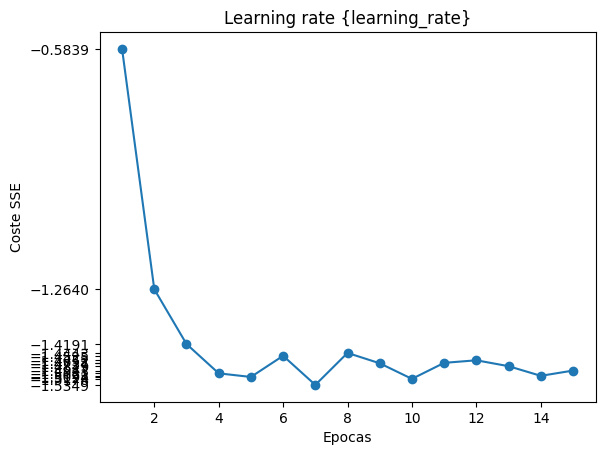

medias: [5.471 2.862]
desviaciones: [0.63848179 1.44130358]


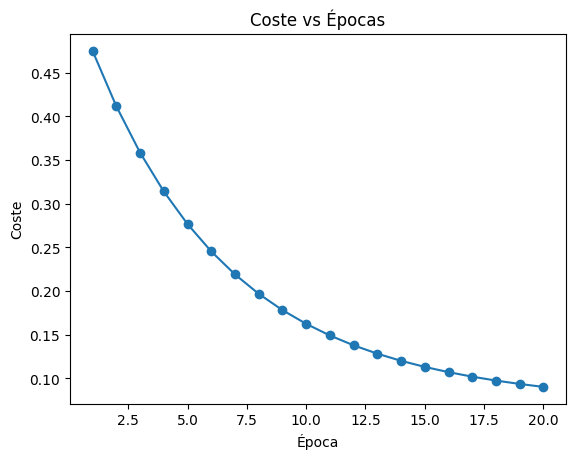

Coste actualizado con normalización: 0.09028225191710001


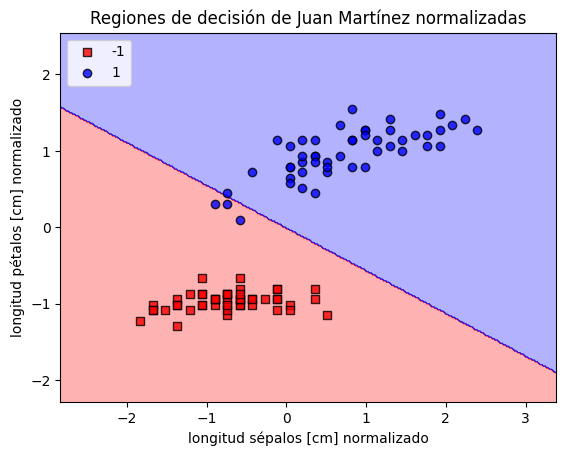

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class AdalineDGS(object):
    """Clasificador ADAptive LInear NEuron de Juan
    Parámetros:
    ------------
    eta: float Learning rate (entre 0.0 y 1.0)
    n_iter: int max. repasos que da (iteraciones) al dataset train
    semilla: int; semilla para el GMA
    Atributos:
    ------------
    w_: Id-array pesos que aprende después de entrenar
    coste_: lista valores de la función de coste SSE en cada época (repaso)
    """
    def __init__(self, eta=0.01, n_iter=50, semilla=1, desordenado=True):
        self.eta = eta
        self.n_iter = n_iter
        self.semilla = semilla
        self.desordenado = desordenado
        self.w_inicializado = False
        
    def fit(self, X, y):
        """ Entrena (Aprende)
        Parámetros:
        --------------
        X: {array}, estructura = [n_ejemplos, n_características]
        y: array, estructura = [n_ejemplos] valores target/label
        Devuelve:
        ----------
        self:object
        """
        self._inicializa_pesos(X.shape[1])
        self.coste_ = []
        for _ in range(self.n_iter):
            if self._desordena:
                X,y = self._desordena(X,y)
            coste= []
            for xi, target in zip(X,y):
                coste.append(self._actualiza_pesos(xi,target))
            costeMedio = sum(coste) / len(y)
            self.coste_.append(costeMedio)
        return self
    
    def parcial_fit(self, X, y):    #Entrena sin reordenar
        if not self.w_inicializado:
            self._inicializa_pesos(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._actualiza_pesos(xi, target)
        else:
            self._actualiza_pesos(X, y)
            return self
        
    def _desordena(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _inicializa_pesos(self, m):
        self.rgen = np.random.RandomState(self.semilla)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size= 1 + m)
        self.w_inicializado = True
        
    def _actualiza_pesos(self, xi, target):
        salida = self.activacion(self.entradas(xi))
        error = target - salida
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        coste = 0.5 * error**2
        return coste
    
    #Añadido Adaline
    def entradas(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    #def net_input(self, X):
    #    return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.entradas(X) >= 0.0, 1, -1)
    
    def activacion(self, X):
        """Calcula la activación lineal"""
        return X
    
    
    
v1 = np.array([1,2,3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))




#PASO 2: PREPARAR EL DATASET
#Leer el Dataset pidiéndolo
#lugar = input('Teclea el fichero con dataset Iris:')
#df = pd.read_csv(lugar, header=None, encoding='utf-8')
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
print('Leyendo dataset de iris')

#preparar los datos de entrenamiento de Iris
y = df.iloc[0:100, 4].values        #seleccionar ejemplos de setosa y versicolor
y = np.where(y == 'Iris-setosa', -1,1) #codificamos en +1 (Iris versicolor) y -1 (Iris-setosa)
X = df.iloc[0:100, [0, 2]].values    #extraer longitud de sépalos y pétalos

"""
#Dibujar los datos
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.ylabel('Longitud sépalo [cm]')
plt.xlabel('Longitud pétalo  [cm]')
plt.legend(loc='upper left')
plt.title(loc='center', label='Dataset Iris de Juan')
plt.show() #plt.savefig('images/02/06.png', dpi=300)
"""

#PASO 3: CREAR Y ENTRENAR UN PERCEPTRÓN
#PASO 4: ENCONTRAR UN VALOR PARA EL LEARNING RATE (0.0002 FINALMENTE)
learning_rate = 0.01
ada1 = AdalineDGS(n_iter=15, eta=learning_rate).fit(X,y)
fig, ax = plt.subplots()
ax.plot(range(1, len(ada1.coste_)+1), np.log10(ada1.coste_), marker='o')
ax.set_yticks(np.log10(ada1.coste_))
plt.xlabel('Epocas')
plt.ylabel('Coste SSE')
plt.title('Learning rate {learning_rate}')
print("Último coste:", ada1.coste_[-1])
plt.show() #plt.savefig('images/02/06.png', dpi=300)

#PASO 5: PREPROCESAR LOS DATOS ANTES DE ENTRENAR
media_X = np.mean(X, axis=0)    #media de las columnas
desviacion_X = np.std(X, axis=0)
print("medias:", media_X)
print("desviaciones:", desviacion_X)
X_normal = (X - media_X) / desviacion_X
#--- Volver a entrenar AdalineGDB(), ajustar learning rate y graficar

learning_rate = 0.0005
ada1 = AdalineDGS(n_iter=20, eta=learning_rate)
ada1.fit(X_normal, y)  #Entrenamos con los datos normalizados

#Graficar el coste
import matplotlib.pyplot as plt
plt.plot(range(1, len(ada1.coste_) + 1), ada1.coste_, marker='o')
plt.xlabel('Época')
plt.ylabel('Coste')
plt.title('Coste vs Épocas')
plt.show()
print("Coste actualizado con normalización:", ada1.coste_[-1])

#PASO 6: Función para dibujar regiones de decisión
def plot_regiones(X, y, clasificador, resolucion=0.02):
    marcadores = ('s', 'o', '^', 'v')
    colores = ('red', 'blue', 'lightgreen', 'gray')
    cmap = ListedColormap(colores[:len(np.unique(y))])
    #Dibujar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    #Dibujar la clase de los ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colores[idx], marker=marcadores[idx],
                    label=cl, edgecolor='black')
        
plot_regiones(X_normal, y, clasificador=ada1)
plt.xlabel('longitud sépalos [cm] normalizado')
plt.ylabel('longitud pétalos [cm] normalizado')
plt.legend(loc='upper left')        #plt.savefig('images/U02_P01_3.png', dpi=300)
plt.title('Regiones de decisión de Juan Martínez normalizadas')
plt.show()


    Vamos a utilizar el dataset iris que ya viene también preinstalado en esta librería y entrenaremos un
    perceptrón para que clasifique usando la longitud y la anchura de los pétalos de una orquídea en una
    de tres categorías (no dos como programamos nosotros anteriormente) sino tres clases. En primer
    lugar cargamos el dataset y lo dividimos en una parte para entrenamiento y otra para validar como
    funciona con el método train_test_split() indicando que el 30% de los datos serán para validar
    (45 ejemplos) y 70% para entrenar (105 ejemplos)

In [4]:
# -*- coding: utf-8 -*-
from sklearn import datasets
import numpy as np

#Cargar el dataset iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]] #extrae la longitud y anchura del pétalo en x
y = iris.target #obtiene las etiquetas de clase para las flores 0,1,2
print('Diferentes clases:', np.unique(y))

#Divide los datos en 2 conjuntos 30 % para test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1, stratify=y)

print('Contar Labels en y:', np.bincount(y))
print('Contar Labels en y_train:', np.bincount(y_train))
print('Contar Labels en y_test:', np.bincount(y_test))


Diferentes clases: [0 1 2]
Contar Labels en y: [50 50 50]
Contar Labels en y_train: [35 35 35]
Contar Labels en y_test: [15 15 15]


    PREGUNTA 8: Marca las respuestas sobre estos parámetros de la función train_test_split():


    El parámetro ramdon_state=valor nos va a permitir:


 Que si ejecutamos dos veces el código, dará los mismos resultados porque inicializa todo lo que ocurra de manera aleatoria al mismo valor

    El parámetro stratify = y nos va a permitir:


Que los datos queden balanceados, que tengan cantidades similares de cada clase

    El parámetro size = 0.3 nos va a permitir:


Que el 30% de los datos se usan para testar el modelo

    PREGUNTA 9: Escribe el código y lo ejecutas. Cuando generes el gráfico, añade tu nombre al título y
    añade la sentencia que lo guarde en el fichero U02_P02_09.png

Diferentes clases: [0 1 2]
Contar Labels en y: [50 50 50]
Contar Labels en y_train: [35 35 35]
Contar Labels en y_test: [15 15 15]


C:\Users\juan_\AppData\Local\Temp\ipykernel_481248\1186840446.py:55: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],


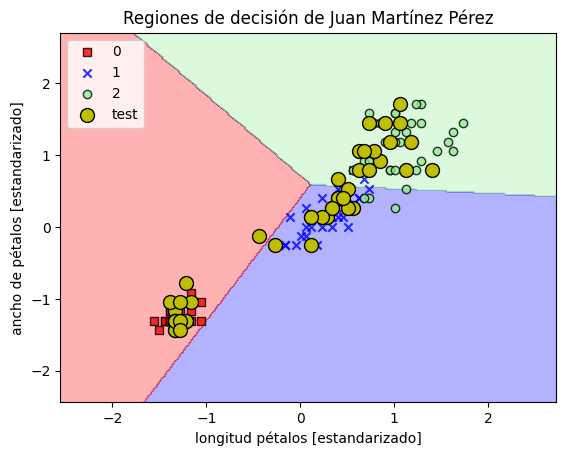

In [ ]:
# -*- coding: utf-8 -*-
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib.colors import ListedColormap

#Cargar el dataset iris
iris = datasets.load_iris()
X = iris.data[:, [2,3]] #extrae la longitud y anchura del pétalo en x
y = iris.target #obtiene las etiquetas de clase para las flores 0,1,2
print('Diferentes clases:', np.unique(y))

#Divide los datos en 2 conjuntos 30 % para test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=1, stratify=y)

print('Contar Labels en y:', np.bincount(y))
print('Contar Labels en y_train:', np.bincount(y_train))
print('Contar Labels en y_test:', np.bincount(y_test))


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_normalizado = sc.transform(X_train)
X_test_normalizado = sc.transform(X_test)

from sklearn.linear_model import Perceptron

#Definir y entrenar al clasificador Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_normalizado, y_train)

#Función para las regiones de decisión
def plot_regiones(X, y, clasificador, test_idx=None, resolucion=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolucion),
                           np.arange(x2_min, x2_max, resolucion))
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, edgecolor='black')
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='y', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test')
        
#Combinar datos normalizados para entrenamiento y test
X_combined_std = np.vstack((X_train_normalizado, X_test_normalizado))
y_combined = np.hstack((y_train, y_test))
    
#Gráfico
plot_regiones(X=X_combined_std, y=y_combined, clasificador=ppn, test_idx=range(105, 150))
plt.xlabel('longitud pétalos [estandarizado]')
plt.ylabel('ancho de pétalos [estandarizado]')
plt.legend(loc='upper left')
plt.title('Regiones de decisión de Juan Martínez Pérez')
plt.savefig('UD02/U02_P02_09.png') #para guardar el gráfico
plt.show()
